# **Deutch Joza Algorithm**

### Making the Constant Function

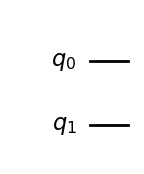

In [49]:
from qiskit import *
import numpy as np

ConstantOracle=QuantumCircuit(2)
# making it probabilistic: sometimes it will be f(x)=1 and othertime f(x)=0
out=np.random.randint(2)
if out==1: #if the random number is 1 then we have the f(x)=1 case
    ConstantOracle.x(1)
# Making the Constant Function.draw('mpl)
ConstantOracle.draw('mpl')

### Making the Balanced Function

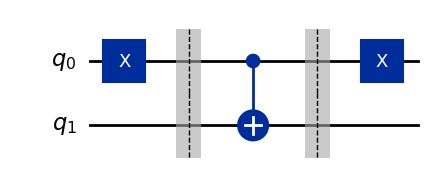

In [50]:
from qiskit import *
import numpy as np

BalancedOracle= QuantumCircuit(2,0) #(Q,C) Q: number of qubits / C: number of classic bits
BalancedOracle.x(0)
BalancedOracle.barrier() # we put the barriers inorder to stop two X to get combined
BalancedOracle.cx(0,1)
BalancedOracle.barrier()
BalancedOracle.x(0)

BalancedOracle.draw('mpl') 


### Deutch Pt.1 

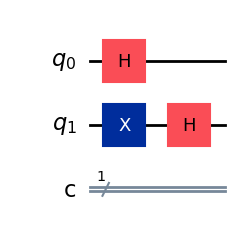

In [51]:
#part 1 of the algorithm

from qiskit import *
import numpy as np

qc1= QuantumCircuit(2,1) #(Q,C) Q: number of qubits / C: number of classic bits


qc1.h(0) 
qc1.x(1)  
qc1.h(1)

qc1.draw('mpl') 

### Deutch Pt.2 

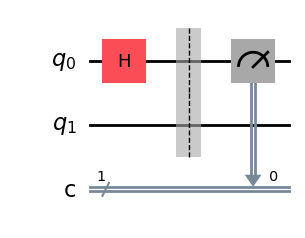

In [52]:
#part 2 of the algorithm

from qiskit import *
import numpy as np

qc2= QuantumCircuit(2,1) #(Q,C) Q: number of qubits / C: number of classic bits

qc2.h(0) 
qc2.barrier()  
qc2.measure(0,0)

qc2.draw('mpl') 

### Choosen Oracle (Balanced)

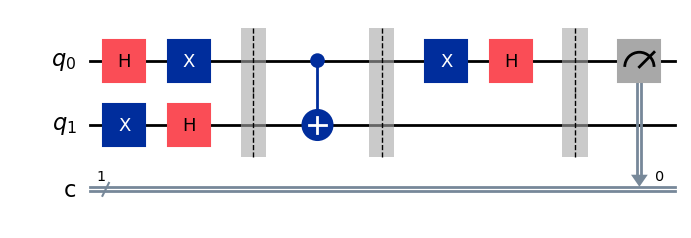

In [53]:
ChoosenOracle= BalancedOracle
#qc += Function
dj = qc1.compose(ChoosenOracle)

deutch=dj.compose(qc2)
deutch.draw('mpl')

#### Result of the Detch with a Balanced function 

result vectors and probability:  {'1': 1}


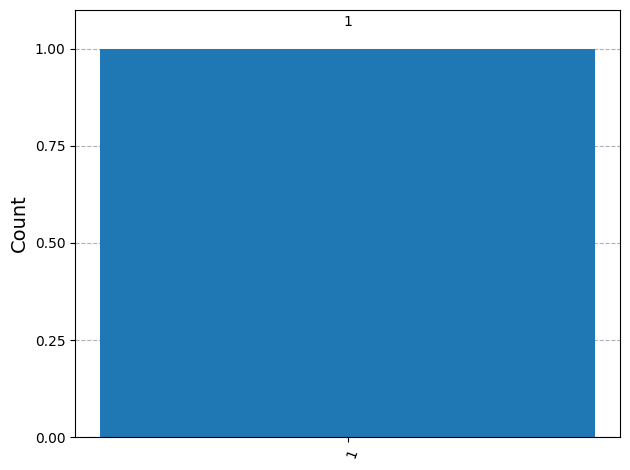

In [54]:
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

#running the circuit (real measurements) to get the counts feature of the circuit needed in histogram

backend = Aer.get_backend('statevector_simulator')
job = backend.run(deutch) 
result = job.result()


counts = result.get_counts()
print("result vectors and probability: ",counts) 


#drawing the histogram
plot_histogram(counts)


### Choosen Oracle (Constant)

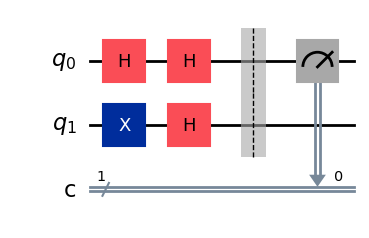

In [55]:
ChoosenOracle= ConstantOracle
#qc += Function
dj = qc1.compose(ChoosenOracle)

deutch=dj.compose(qc2)
deutch.draw('mpl')

#### Result of the Detch with a Constant function 

result vectors and probability:  {'0': 1}


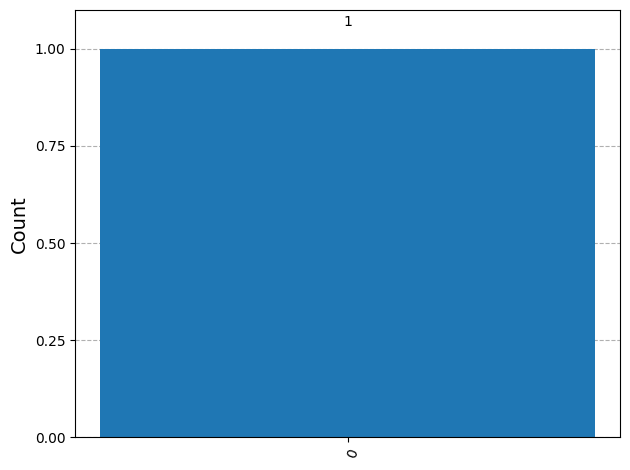

In [56]:
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

#running the circuit (real measurements) to get the counts feature of the circuit needed in histogram

backend = Aer.get_backend('statevector_simulator')
job = backend.run(deutch) 
result = job.result()


counts = result.get_counts()
print("result vectors and probability: ",counts) 


#drawing the histogram
plot_histogram(counts)
